<a href="https://colab.research.google.com/github/pavss/pavithra/blob/main/logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
from google.colab import files
uploaded = files.upload()

Saving Shoes_data.csv to Shoes_data (7).csv


In [151]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [152]:
data = pd.read_csv('Shoes_data.csv')

In [153]:
data.head()

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,"2,242","₹1,098","Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,₹674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,"16,662",₹588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,₹599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,₹982,Men's Velocity Runner Lp Running Shoe,4.0


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23940 non-null  object 
 1   How_Many_Sold    23940 non-null  object 
 2   Current_Price    23142 non-null  object 
 3   Product_details  23940 non-null  object 
 4   RATING           23940 non-null  float64
dtypes: float64(1), object(4)
memory usage: 935.3+ KB


In [155]:
data.dtypes

Brand_Name          object
How_Many_Sold       object
Current_Price       object
Product_details     object
RATING             float64
dtype: object

In [156]:
data['How_Many_Sold'] = pd.to_numeric(data['How_Many_Sold'],errors='coerce')

In [157]:
data.dtypes

Brand_Name          object
How_Many_Sold      float64
Current_Price       object
Product_details     object
RATING             float64
dtype: object

In [158]:
data.describe()

,How_Many_Sold,RATING
count,16359.000000,23940.000000
mean,324.048780,3.836667
std,275.926056,0.410686
min,2.000000,2.400000
25%,112.000000,3.600000
50%,240.000000,4.000000
75%,421.000000,4.000000
max,998.000000,4.600000


In [159]:
data.columns

Index(['Brand_Name', 'How_Many_Sold', 'Current_Price', 'Product_details',
       'RATING'],
      dtype='object')

In [160]:
data.isnull().sum()

Brand_Name            0
How_Many_Sold      7581
Current_Price       798
Product_details       0
RATING                0
dtype: int64

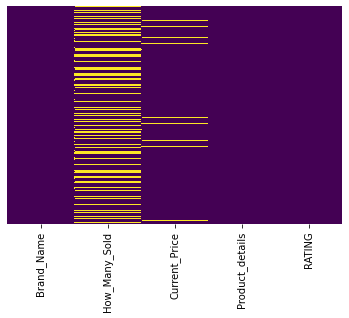

In [161]:
sns.heatmap(data.isnull(),cmap = 'viridis',cbar = False,yticklabels = False)

In [162]:
data['Current_Price'].fillna(0,inplace = True)
data['How_Many_Sold'].fillna(0,inplace = True)

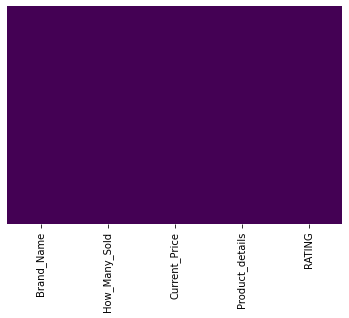

In [163]:
sns.heatmap(data.isnull(),cmap = 'viridis',cbar = False,yticklabels = False)

In [164]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

Analysis

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23940 non-null  object 
 1   How_Many_Sold    23940 non-null  float64
 2   Current_Price    23940 non-null  object 
 3   Product_details  23940 non-null  object 
 4   RATING           23940 non-null  float64
dtypes: float64(2), object(3)
memory usage: 935.3+ KB


In [166]:
data.drop(['Brand_Name','Product_details','Current_Price'],axis = 1,inplace = True)

In [167]:
data.head()

,How_Many_Sold,RATING
0,0.0,3.8
1,240.0,4.0
2,0.0,3.8
3,135.0,4.0
4,240.0,4.0


In [168]:
data.corr()

,How_Many_Sold,RATING
How_Many_Sold,1.000000,-0.006465
RATING,-0.006465,1.000000


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train,X_test,Y_train,Y_test = train_test_split(data.drop('How_Many_Sold',axis = 1),data['How_Many_Sold'],random_state = 23,test_size  =0.3)

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
model1 = LinearRegression()

In [173]:
model1.fit(X_train,Y_train)

LinearRegression()

In [174]:
pred = model1.predict(X_test)

In [175]:
model1.intercept_

239.63871121537005

In [176]:
model1.coef_

array([-4.733776])

In [178]:
from sklearn.metrics import r2_score,mean_squared_error

In [179]:
print('The R2 is: ', r2_score(Y_test,pred))

The R2 is:  1.8401441778559402e-05
